<a href="https://colab.research.google.com/github/alphadev3296/deep-learning-practice/blob/main/Chapter-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# XOR with Single Layer Perceptron - FAIL

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if step % 1000 == 0:
    print(step, cost.item())

with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()

  print(f"Hypothesis: {hypothesis.detach().cpu().numpy()}")
  print(f"Predicted: {predicted.detach().cpu().numpy()}")
  print(f"Y: {Y.cpu().numpy()}")
  print(f"Accuracy: {accuracy.item()}")

0 0.7273973822593689
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996
Hypothesis: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Predicted: [[0.]
 [0.]
 [0.]
 [0.]]
Y: [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 0.5


In [2]:
# XOR with Multi Layer Perceptron - Success

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
  nn.Linear(2, 10, bias=True),
  nn.Sigmoid(),
  nn.Linear(10, 10, bias=True),
  nn.Sigmoid(),
  nn.Linear(10, 10, bias=True),
  nn.Sigmoid(),
  nn.Linear(10, 1, bias=True),
  nn.Sigmoid()).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for epoch in range(10001):
  optimizer.zero_grad()
  hyperthesis = model(X)
  cost = criterion(hyperthesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(epoch, cost.item())

with torch.no_grad():
  hyperthesis = model(X)
  predicted = (hyperthesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print(f"Hypothesis: {hyperthesis.detach().cpu().numpy()}")
  print(f"Predicted: {predicted.detach().cpu().numpy()}")
  print(f"Y: {Y.cpu().numpy()}")
  print(f"Accuracy: {accuracy.item()}")

0 0.6948983669281006
1000 0.6931380033493042
2000 0.6931171417236328
3000 0.6930763125419617
4000 0.6929103136062622
5000 0.6820820569992065
6000 0.0013024790678173304
7000 0.0004836432926822454
8000 0.0002889953029807657
9000 0.00020379797206260264
10000 0.0001565151324030012
Hypothesis: [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
Predicted: [[0.]
 [1.]
 [1.]
 [0.]]
Y: [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0


image-0: 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
label-0: 
0


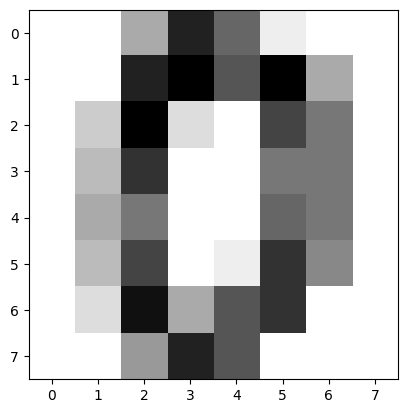

sample count: 1797
image size: (8, 8)


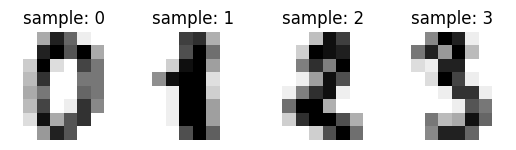

0 0-th label: 0
1 1-th label: 1
2 2-th label: 2
3 3-th label: 3
4 4-th label: 4
data shape: (1797, 64)
data-0: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [19]:
# Scikit Learn Digit Data

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

# Show first image
print(f"image-0: \n{digits.images[0]}")
print(f"label-0: \n{digits.target[0]}")
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

print(f"sample count: {len(digits.images)}")
print(f"image size: {digits.images[0].shape}")

# Show the first 4 images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
  plt.subplot(2, 4, index + 1)
  plt.axis("off")
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  plt.title(f"sample: {label}")
plt.show()

# Check labels
for i in range(5):
  print(i, f"{i}-th label: {digits.target[i]}")

# Check data
print(f"data shape: {digits.data.shape}")
print(f"data-0: \n{digits.data[0]}")

Epoch: 0, Loss: 2.411224365234375
Epoch: 100, Loss: 0.14881376922130585
Epoch: 200, Loss: 0.05375979095697403
Epoch: 300, Loss: 0.023307954892516136
Epoch: 400, Loss: 0.011496049351990223
Epoch: 500, Loss: 0.0065620155073702335
Epoch: 600, Loss: 0.004179717972874641
Epoch: 700, Loss: 0.002867560600861907
Epoch: 800, Loss: 0.002076967153698206
Epoch: 900, Loss: 0.0015670961001887918


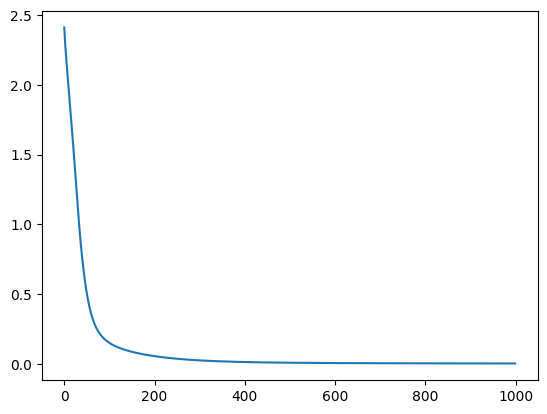

Accuracy: 1.0


In [25]:
# Classification Handwriting Digits using Perceptron

import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import random

torch.manual_seed(777)
random.seed(777)

digits = load_digits()
X = digits.data
Y = digits.target

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X)
    loss = loss_fn(output, Y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Loss: {loss.item()}")
    losses.append(loss.item())

plt.plot(losses)
plt.show()

with torch.no_grad():
  output = model(X)
  predicted = torch.argmax(output, dim=1)
  accuracy = (predicted == Y).float().mean()
  print(f"Accuracy: {accuracy.item()}")

first_data: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   

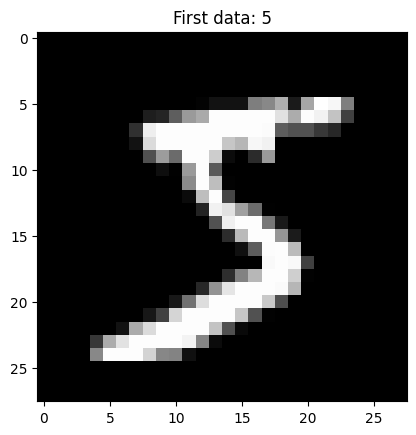

Epoch: 0, Loss: 0.08140198141336441
Epoch: 1, Loss: 0.01384445559233427
Epoch: 2, Loss: 0.058324385434389114


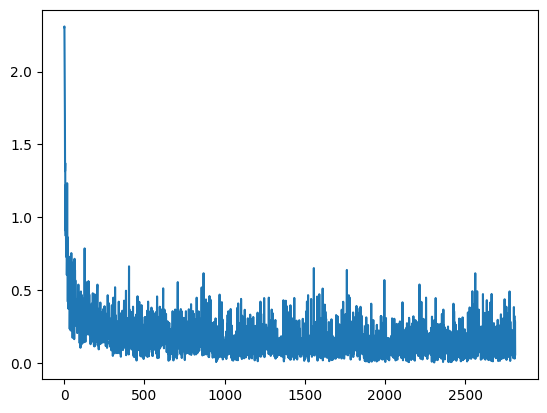

Accuracy: 95.63000000000001% (9563/10000)
Predicted: 9, Actual: 9


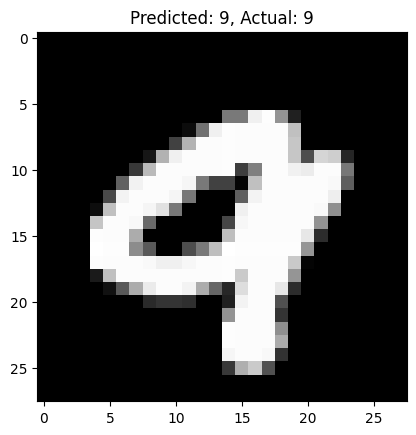

In [36]:
# MNIST Classification using Multi Layer Perceptron

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

# Load and analyze dataset
mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
print(f"first_data: {mnist.data[0]}")
print(f"first_label: {mnist.target[0]}")

X = mnist.data / 255
Y = mnist.target

print(f"data shape: {X.shape}")
print(f"label shape: {Y.shape}")

plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.title(f"First data: {Y[0]}")
plt.show()

# Split into Train data and Test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

# Convert to Tensor
X_tran = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create TensorDataset instance
ds_train = TensorDataset(X_tran, y_train)
ds_test = TensorDataset(X_test, y_test)

# Create DataLoader instance
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

# Create Model
model = nn.Sequential()
model.add_module("fc1", nn.Linear(28*28*1, 100))
model.add_module("relu1", nn.ReLU())
model.add_module("fc2", nn.Linear(100, 100))
model.add_module("relu2", nn.ReLU())
model.add_module("fc3", nn.Linear(100, 10))

# Choose loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train
losses = []
epochs = 3
for epoch in range(epochs):
  for data, targets in loader_train:
    optimizer.zero_grad()
    y_pred = model(data)
    loss = loss_fn(y_pred, targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

  print(f"Epoch: {epoch}, Loss: {loss.item()}")

plt.plot(losses)
plt.show()

# Check Accuracy
model.eval()
correct = 0

print("Training ...")
with torch.no_grad():
  for data, targets in loader_test:
    y_pred = model(data)
    predicted = torch.argmax(y_pred, dim=1)
    correct += (predicted == targets).sum().item()

data_num = len(loader_test.dataset)
print(f"Accuracy: {correct / data_num * 100}% ({correct}/{data_num})")

# Test with Sample
index = 2025
data = X_test[index]
hyperthesis = model(data)
pred = torch.argmax(hyperthesis)
print(f"Predicted: {pred}, Actual: {y_test[index]}")
plt.imshow(data.reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {pred}, Actual: {y_test[index]}")
plt.show()